In [ ]:
%pip install mnist
%pip install tensorflow
%pip install visualkeras
import numpy as np
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

import visualkeras

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

num_filters = 8
filter_size = 3
pool_size = 2

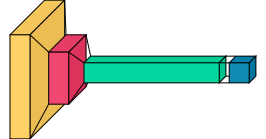

In [33]:
# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

visualkeras.layered_view(model)

In [40]:
# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1040 - accuracy: 0.9694 - val_loss: 0.1035 - val_accuracy: 0.9678
Epoch 2/3
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0892 - accuracy: 0.9742 - val_loss: 0.0918 - val_accuracy: 0.9714
Epoch 3/3
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0806 - accuracy: 0.9762 - val_loss: 0.0829 - val_accuracy: 0.9738


In [35]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

1/1 [==============================] - 0s 127ms/step
[7 2 1 0 4]
[7 2 1 0 4]
